# Atmospheric oxidation reaction with •OH radical

**OH attack on the double bonds of aliphatic chains**

In [ ]:
# Install RDKit.
%%capture
!pip install rdkit

In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import os
print('RDKit version: ', rdkit.__version__)

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
rdkit.RDLogger.DisableLog('rdApp.*')  # Suppress RDKit error messages

RDKit version:  2025.03.3


TXT file with specific SMILES molecules of DIESEL fuel

In [ ]:
os.chdir("/content/")

file_name = 'smiles-diesel.txt'   # fazer o upload do arq TXT na pasta 'content' do Colab antes de tudo

reacao = AllChem.ReactionFromSmarts('[#6:1]\[#6:2]=[#6:3]\[#6:4]>>[#6:4]-[#6:3]-[#6:2](-[#6:1])-[#8]')

In [ ]:
with open(file_name, "r") as f, open('sanitize02.txt', 'w') as f_out:
    smiles = []
    all_products = []  # Initialize all_products before the loop
    for line in f:
        smiles.append(line.split('\n')[0])
        m = Chem.MolFromSmiles(line)
        if m is None:
            continue
        ps = reacao.RunReactants((m,))
        # Sanitize each product molecule individually
        tp = 0    # contador de moleculas sanitizadas
        for product_tuple in ps:
            for product_mol in product_tuple:
                try:
                    Chem.SanitizeMol(product_mol)  #verificando a "existencia" da molecula
                    tp = tp + 1
                except:
                    continue # Skip to the next molecule

                all_products.append(product_mol) #add the sanitized molecule

        #print(tp) # total de  moleculas sanitizadas por reagente
        f_out.write(str(tp) + '\n')

## Display unique products

In [ ]:
unique_products = []
product_smiles = set()
for mol in all_products:
    smi = Chem.MolToSmiles(mol)
    if smi not in product_smiles:
        product_smiles.add(smi)
        unique_products.append(mol)
len(unique_products) #total of unique_products

10

In [ ]:
# saving the sanitized products in 'saida.txt'
with open('saida.txt', 'w') as f:
    for mol in unique_products:
        smi = Chem.MolToSmiles(mol)
        f.write(smi + '\n')

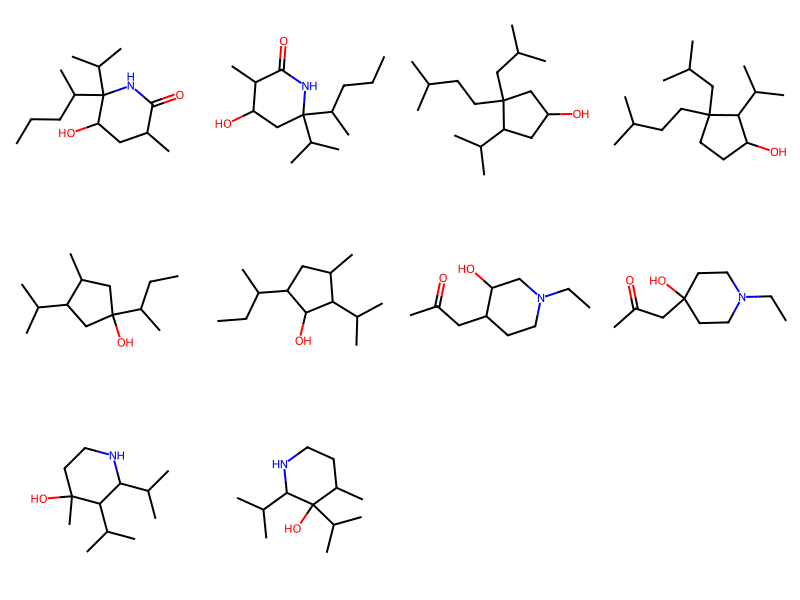

In [ ]:
Draw.MolsToGridImage(unique_products, molsPerRow=4)